In [98]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.descriptivestats import sign_test

%matplotlib inline

## Задача 1

## Задача 2

### загрузка данных

In [56]:
samples = np.load('./data/hw6t2.npy')

In [57]:
X, Y = samples[:, 0], samples[:, 1]

### exploratory data analysis

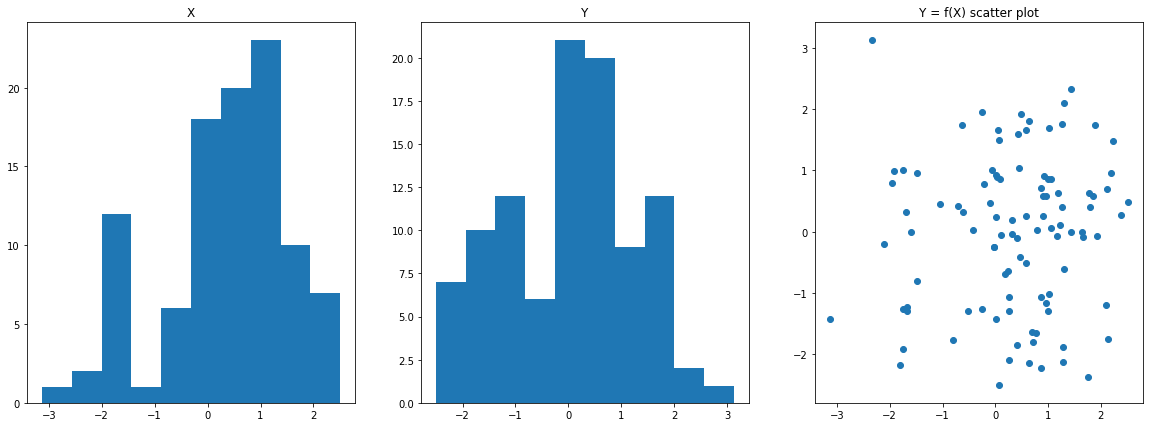

In [58]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.hist(X)
plt.title('X')
plt.subplot(1, 3, 2)
plt.hist(Y)
plt.title('Y')
plt.subplot(1, 3, 3)
plt.scatter(X, Y)
plt.title('Y = f(X) scatter plot')
plt.show()

### Корелляции

In [59]:
print('kendall corr={:.3f}, pval={:.3f}'.format(*sps.kendalltau(X, Y)))
print('spearman corr={:.3f}, pval={:.3f}'.format(*sps.spearmanr(X, Y)))
print('pearson corr={:.3f}, pval={:.3f}'.format(*sps.pearsonr(X, Y)))

kendall corr=0.049, pval=0.467
spearman corr=0.070, pval=0.488
pearson corr=0.068, pval=0.501


**Как мы видим, выборки не скореллированы**

### Нормальность

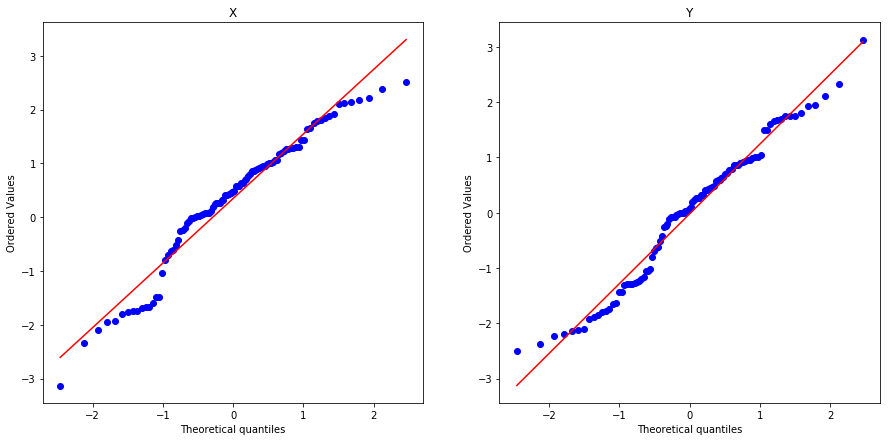

In [60]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sps.probplot(X, plot=plt)
plt.title('X')
plt.subplot(1, 2, 2)
sps.probplot(Y, plot=plt)
plt.title('Y')
plt.show()

Не тянет на нормальное распределение

### проверка на однородность

In [61]:
sps.anderson_ksamp([X, Y])

Anderson_ksampResult(statistic=2.4571124118904, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.03147842175123911)

Как мы видим, на уровне значимости $\alpha = 0.05$, гипотезу о том, что выборки однородны, отвергнуть мы не можем

## Задача 3

In [48]:
data = np.loadtxt('./data/weight.txt', skiprows=1)
data[:2]

array([[80.5, 82.2],
       [84.9, 85.6]])

In [49]:
before, after = data[:, 0], data[:, 1]

В задании написано, что выборки из 50 человек, но в файлике было 29:

In [90]:
len(before), len(after)

(29, 29)

In [73]:
sps.kendalltau(before, after)

KendalltauResult(correlation=0.4573579036177395, pvalue=0.0005164530410263133)

**Выборки зависимые**

In [84]:
sps.shapiro(after)[1], sps.shapiro(before)[1]

(0.20574407279491425, 0.5579800605773926)

**Выборки из нормального распределения**

(array([ 2.,  3.,  5., 10.,  2.,  1.,  1.,  2.,  2.,  1.]),
 array([-9.1, -6.1, -3.1, -0.1,  2.9,  5.9,  8.9, 11.9, 14.9, 17.9, 20.9]),
 <a list of 10 Patch objects>)

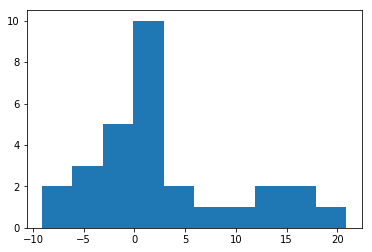

In [111]:
plt.hist(after - before)

За статитстическую процедуру возьмем метод Холма. Гипотезы, учитывая то, что у нас выборки зависимые, можем использовать:

1. Двувыборочный критерий знаков

2. Двувыборочный критерий знаковых рангов Уилкоксона

3. Парный t-тест

In [115]:
pvals = [
    sign_test(before - after)[1],
    sps.wilcoxon(before, after)[1], 
    sps.ttest_rel(before, after)[1]
]

In [117]:
multtest_info = multipletests(pvals, alpha=0.05, method='holm')

In [118]:
rejected = multtest_info[0]
rejected

array([False, False, False])

Ни одну из гипотез отклонить на уровне значимости 0.05 мы не можем.

**Поэтому мы не можем сказать, что терапия была эффективной.**

## Задача 4

In [62]:
data = np.load('./data/hw6t4.npy')

In [63]:
X, Y = data[:, 0], data[:, 1]

### exploratory data analysis

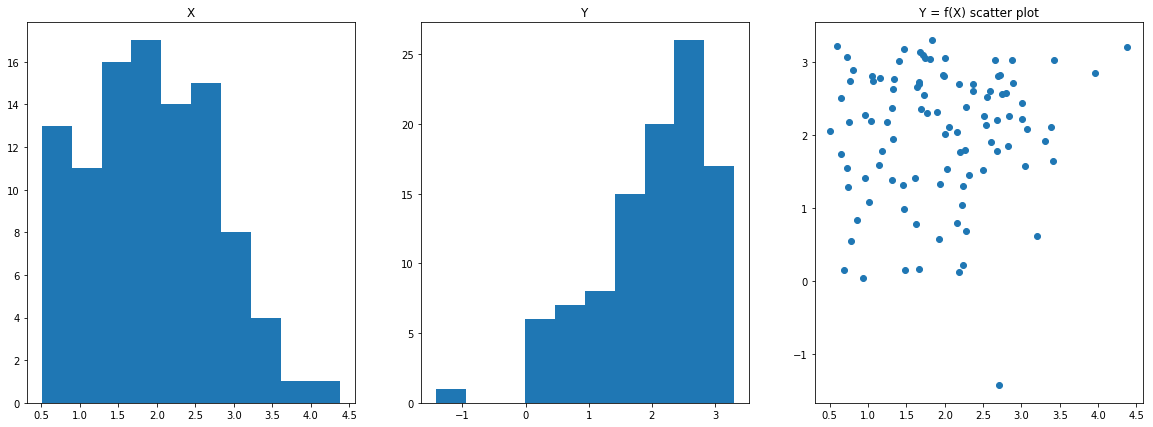

In [64]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.hist(X)
plt.title('X')
plt.subplot(1, 3, 2)
plt.hist(Y)
plt.title('Y')
plt.subplot(1, 3, 3)
plt.scatter(X, Y)
plt.title('Y = f(X) scatter plot')
plt.show()

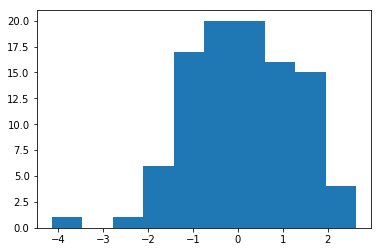

In [121]:
plt.hist(Y - X)
plt.show()

### Парные/независимые

In [66]:
print('kendall corr={:.3f}, pval={:.3f}'.format(*sps.kendalltau(X, Y)))
print('spearman corr={:.3f}, pval={:.3f}'.format(*sps.spearmanr(X, Y)))
print('pearson corr={:.3f}, pval={:.3f}'.format(*sps.pearsonr(X, Y)))

kendall corr=0.050, pval=0.460
spearman corr=0.074, pval=0.464
pearson corr=0.094, pval=0.352


**Как мы видим, выборки не скореллированы**

За статитстическую процедуру возьмем метод Бенджамини-Иекутиели. Гипотезы:

1. О нормальности

1. О нескореллированности

1. Двувыборочный критерий знаков

2. Критерий Манна-Уитни


In [126]:
pvals = [
    sps.shapiro(X)[1],
    sps.shapiro(Y)[1],
    sps.pearsonr(X, Y)[1],
    sign_test(Y - X)[1],
    sps.mannwhitneyu(X, Y)[1]
]

In [130]:
multipletests(pvals, alpha=0.1, method='fdr_by')

(array([False,  True, False, False, False]),
 array([2.88925845e-01, 2.66157679e-04, 1.00000000e+00, 1.00000000e+00,
        2.88925845e-01]),
 0.0208516376390232,
 0.02)

Мы можем отклонить только гипотезу о нормальности выборки Y. Остальные гипотезы отклонить не можем. 